## Reduced Data Clustering 02

In this notebook, we'll visualize the clusters generated by clustering over several different UMAP representations

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import os
import plotly.express as px 
import seaborn as sns
import random
import numpy as np

sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})

First, let's define a method to visualize the clusters

In [2]:
palette = ["ff9eef","ffd5b0","ffacb1","ff9abf","9effe2","75edff","ffeda7","a7c0ff","9ab5ff"]
# palette=["ff1eda","ff8f2c","ff2937","ff1b6e","1effbc","02ddff","ffd325","2563ff","1b57ff"]

palette = [f'#{p}' for p in palette]

seaborn_palettes=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [3]:
random.sample(seaborn_palettes, 1)[0]

'rocket_r'

0


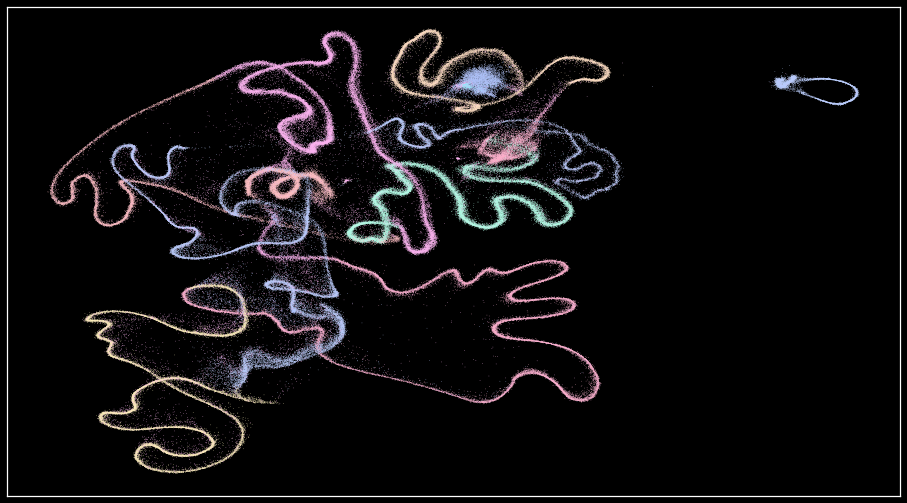

1


KeyboardInterrupt: 

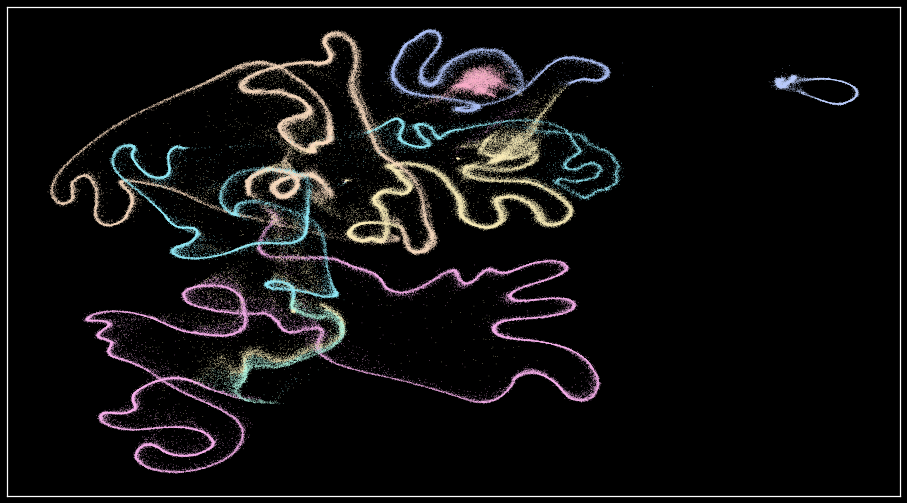

In [9]:
def plot(data, palette, title=''):
    fig, ax = plt.subplots(figsize=(16, 9))
    g = sns.scatterplot(
        x='0', 
        y='1',
        data=data,
        hue='label',
        legend=None,
        ax=ax,
        s=0.3,
        palette=sns.color_palette(palette, data['label'].nunique()),
    )
    
    g.set(xticklabels=[], yticklabels=[])
    plt.xlabel(None)
    plt.ylabel(None)
    plt.grid(False)
    plt.savefig(f'poster_{title}.png', bbox_inches='tight', dpi=500)
    plt.show()

    
for i, p in enumerate(os.listdir('../data/processed/labels/')):
    palette = random.sample(palette, len(palette))
    palette = sns.color_palette(palette, n_colors=27)
    
    umap = pd.read_csv('../data/processed/umap/primary_reduction_neighbors_50_components_2.csv')
    labels = pd.read_csv(f'../data/processed/labels/{p}')
    umap['label'] = labels['# label']
    print(i)
    plot(umap, random.sample(palette, len(palette)), i)

In [28]:
umap = pd.read_csv('../data/processed/umap/primary_reduction_neighbors_50_components_2.csv')
labels = pd.read_csv(f'../data/processed/labels/{p}')
umap['label'] = labels['# label']


In [29]:
import plotly.graph_objects as go

In [35]:
import plotly.graph_objects as go
from plotly.validators.scatter.marker import SymbolValidator

raw_symbols = SymbolValidator().values
namestems = []
namevariants = []
symbols = []
for i in range(0,len(raw_symbols),3):
    name = raw_symbols[i+2]
    symbols.append(raw_symbols[i])
    namestems.append(name.replace("-open", "").replace("-dot", ""))
    namevariants.append(name[len(namestems[-1]):])